## Module 3: Exploratory data analysis  

### Lesson 1: Descriptive Statistics

### Part 3.1.1  : Finding the average of the data

- ***Statistics***: 
    - A way to get information from data.
    - The science that deals with the collection, classification, analysis, and interpretation of numerical facts or data, and that, by use of mathematical theories of probability, imposes order and regularity on aggregates of more or less disparate elements.

- ***Descriptive Statistics***:
    - Deals with methods of organizing, summarizing, and presenting data in a convenient and informative way.

- ***Measures of Central Tendency:***
    - Average is the common terminology used for all the measures of central tendency. However, most people use average as a synonym for mean.
    - Mean: $\mu=\frac{\sum\limits _{i=1} ^{N}x_{i}}{N}$
    - Median: The median is calculated by placing all the observations in ascending or descending order.
        - n is Odd: The observation that falls in the middle is the median. $(\frac{n+1}{2})^{th}$ item.
        - n is Even: Median is determined by averaging the two observations in the middle, $\frac{(\frac{n}{2}) ^{th} +(\frac{n}{2}+1) ^{th} }{2}$ item.
    - Mode: Observation that has the highest frequency.

In [89]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# read the data file
pos_data = pd.read_csv('POS_CleanData.csv')

In [91]:
# a quick look at the data
pos_data.head()   

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0


###### What is the average revenue of sales?

In [92]:
# simple mean of revenue
pos_data['Revenue($)'].mean().round(2)

14377.15

######  What is the median value of units being sold?

In [93]:
# median of units sold
pos_data['Units_sold'].median()

764.0

######  Which brand has appeared most number of times in our sales data?

In [94]:
# the modal value of 'brand'
pos_data['Brand'].mode()

0    Gain
Name: Brand, dtype: object

As the data can have more than one mode (multi-modal distribution), the result of `mode()` function is displayed as a series.

In [96]:
# alternatively, we can use value_counts() and check the top index, 
# as value_counts() always sorts in descending order
pos_data['Brand'].value_counts().index[0]

'Gain'

### Part 3.1.2  : Understanding the spread of the data - Part I
- Understanding the variability or spread of the data around the centered (mean) value is an important aspects in analyzing the data.
- If the data is more diverse, then drawing inferences from it and generalizing the same will be difficult.
- In statistics, deviation in the data are captured through measures of dispersion.
- Following are the important measures of dispersion:
    - **Range** = Largest observation in the data - Smallest observation in the data
    - **Variance** : 
        - How far each observation is from the mean. These differences from the mean are called deviations.
        - The average squared deviation from the mean is called the variance: 
    
       $\sigma ^{2}=\frac{1}{N}{\sum\limits _{i=1} ^{N}(x_{i}-\mu) ^{2}}$ 

    - **Standard Deviation**: Square root of variance is called standard deviation or SD

#### Let's understand SD more conceptually
- Standard deviation is also used as a measure of risk.
- That is, deviation in the data is used as a key factor in risk analysis. 
- For example: You are trying to pick stock for investing in the equity market. Stock A has an annual return of 15%, with a std deviation of 30%. Stock B has an annual return of 12%, with a std deviation of 8%. If you were risk averse, which would you choose? ***Obviously, the answer is Stock B***

#### Analyze the revenue of sales and understand the dispersion of it around the average.

In [97]:
# find the mean of revenue
print("Average revenue is:", round(pos_data['Revenue($)'].mean(),2))

Average revenue is: 14377.15


In [98]:
# find the variance of revenue
print("Variance of revenue is:", round(pos_data['Revenue($)'].var(),2))

Variance of revenue is: 180225204.38


In [99]:
# find the standard deviation of revenue
print("Standard deviation of revenue is:",round(pos_data['Revenue($)'].std(),2))

Standard deviation of revenue is: 13424.8


***Explanation:***
- We can see that there is a high degree of variation in the revenue.
- This may be because of too many outliers in the data. Outliers are extreme values in the data. 
- We can observe the outliers in the data through a box plot, which we will see soon. 
- However, at this stage, we can analyze the reason for a large value of SD as - there are many records in the dataset, where revenue is zero.
- Let us check the minimum and maximum values of revenue, and then check the number of records having zero revenue.

In [100]:
# minimum value of revenue
print("Minimum value of revenue is:",pos_data['Revenue($)'].min())   #minimum revenue recorded is 0

Minimum value of revenue is: 0


In [101]:
# maximum. value of revenue
print("Maximum value of revenue is:",pos_data['Revenue($)'].max())    #maximum revenue recorded is 48572

Maximum value of revenue is: 48572


In [102]:
# count the records having zero revenue
df= pos_data.loc[pos_data['Revenue($)']==0]
df.shape[0]

12027

In [103]:
# percent of records with zero revenue
round(df.shape[0]/pos_data.shape[0]*100,2)

38.73

***Around 39% of the data has zero revenue, resulting in a large standard deviation***

***This leads to a question:***
- Is the zero revenue spread across products or is it only a few products that often have zero revenue?
- Let us group the data by SKU ID and then check the deviation in total revenue per SKU.


In [104]:
# how is the zero revenue spread?
df=pos_data.groupby('SKU ID').agg(Revenue_avg=('Revenue($)','mean')).round(2)
df

,Revenue_avg
SKU ID,
SKU1011,18370.48
SKU1012,14881.17
SKU1013,17554.64
SKU1014,15142.50
SKU1015,16404.83
...,...
SKU1386,15053.82
SKU1387,15462.95
SKU1388,13529.29


In [105]:
# report the mean
round(df['Revenue_avg'].mean(),2)

14377.46

In [106]:
#report the standard deviation
round(df['Revenue_avg'].std(),2)

1997.86

***Explanation:***
- The SD of entire dataset was 13424.8, but the SD of total revenue per product is 1997.86
- There is a drastic reduction in SD.
- So, with the current information, we can infer that the zero revenue is spread across the products.
- This helps us to conclude that there might be certain days where certain products have not been sold. 
- Such analysis is a very useful in creating marketing and stocking strategies.
- However, the following code reveals that there are indeed few products which are not generating good revenue.

In [107]:
# distribution of mean revenue
df['Revenue_avg'].sort_values()

SKU ID
SKU1148     5138.92
SKU1368     6226.43
SKU1176     9550.35
SKU1171     9617.71
SKU1153     9631.74
             ...   
SKU1142    19749.85
SKU1138    19770.79
SKU1178    20459.21
SKU1135    20854.93
SKU1165    21358.26
Name: Revenue_avg, Length: 380, dtype: float64

***Average revenue generated by products like SKU1148, SKU1368 etc. are very low compared to that of SKU1135, SKU1165 etc.***

***NOTE:***
- Data analysis can be at four levels:
    - Descriptive analysis
    - Diagnostic analysis
    - Predictive analysis
    - Prescriptive analysis
- ***Descriptive analysis*** tells us **what has happened in the past**. 
    - When we initially checked what is the mean and standard deviation of the revenue and found out that there is a huge variation, we actually did the diagnostic analysis.
- ***Diagnostic analysis*** tells us **why something has happened**. 
    - We grouped the data by product and found the variability in the revenue, and realized that zero revenue for certain products on certain days has caused the high SD, we actually diagnosed the reason behind our previous result.
- ***Predictive analysis*** tells us **what may happen in future**.
    - If we are able to predict the future sales based on the historical data, then it is predictive analysis. We will be able do this using machine learning algorithms. And, this is beyond the scope of this course.
- ***Prescriptive analysis*** tells us **what actions to be taken to drive the future**.    
    - If our predictive analysis tells us that the sales is going to decline, as a business strategist, we must find out the ways to improve the same. We may need to analysis what has caused the reduction in sales and then take appropriate action to resolve the issue. 
    - If our predictive analysis indicates the increase in sales in upcoming days, we can think of how can we improve the rate of increase. 

### Part 3.1.3  : Understanding the spread of the data - Part II

There are a few more measures to understand the variability in the data which will help us to draw some inferences.

#### Quantiles - quartiles, percentiles *etc.*
- Quantile is a certain portion of the given data, when the data is sorted in the ascending order.
- Quartile is one portion among four equal divisions of the data. 
    - That is, we need to divide the data in to 4 equal parts. 
    - 1st Quartile (Q1) includes first 25% of the data (lowest value onwards). 
    - 2nd Quartile (Q2) defines 50% of the data (this also equal to median)
    - 3rd Quartile (Q3) defines 75% of the data 
- Percentile is one portion among 100 equal divisions of the data, when the data is sorted in the ascending order.
    - We can have P1 to P99.
    - P25 is equal to Q1
    - P50 is equal to Q2, which is same as median
    - P75 is equal to Q3
- The inter-quartile range (IQR) is the difference between Q3 and Q1. This gives the idea about the spread of middle 50% of our data. 

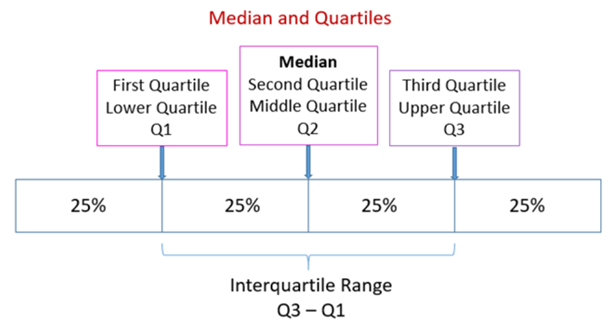

In [108]:
# five number summary
print("Minimum value of revenue is: ", pos_data['Revenue($)'].min())
print('25th percentile or Q1 is: ', pos_data['Revenue($)'].quantile(0.25)) 
print('50th percentile or Q2 or median is: ', pos_data['Revenue($)'].quantile(0.5)) 
print('75th percentile or Q3 is: ', pos_data['Revenue($)'].quantile(0.75)) 
print('IQR is: ', pos_data['Revenue($)'].quantile(0.75)-pos_data['Revenue($)'].quantile(0.25)) 
print("Maximum value of revenue is: ", pos_data['Revenue($)'].max())

Minimum value of revenue is:  0
25th percentile or Q1 is:  0.0
50th percentile or Q2 or median is:  14926.0
75th percentile or Q3 is:  25655.0
IQR is:  25655.0
Maximum value of revenue is:  48572


***Inference:***
- We can see that the minimum value and first quartile (Q1) both are zero.
- This indicates that 25% of the revenue falls between 0 and 0 (the actual meaning of Q1). This is a known fact, as we have seen earlier that around 39% of our data has zero revenue, and obviously, in the sorted list, all these zero-revenue records will appear in the beginning.
- However, Q2 is 14926. This indicates that 50% of the revenue falls between 0 and USD 14926.
- Also, we can infer that 75% of the revenue falls between 0 and  USD 25655.
- As Q1 is zero, we can say that the spread of middle half of the revenue is also USD 25655.

***NOTE:***
- We have now computed quartiles and IQR for the revenue. 
- However, as we know that there are many zero-revenue records, it is better to visualize the data through a plot, called box and whisker plot.
- In Python, we can use the libraries like ***matplotlib***, ***seaborn*** etc. to visualize data.

### Box and Whisker Plot
- Gives visual interpretation of 5-number summary
- Five number summary includes:
    - Lower whisker: shows minimum value as a horizontal line (lower whisker), excluding outliers
    - Upper whisker: shows maximum value as a horizontal line (upper whisker), excluding outliers
    - three quartiles: 
        - lower line of the box: 1st Quartile
        - Middle line: 2nd Quartile or Median
        - Uppler line: 3rd Quartile
- Outliers:
    - Greater than Q3 + (1.5 * IQR) or lesser than Q1 - (1.5 * IQR)

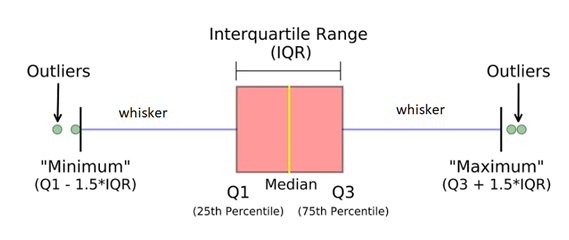

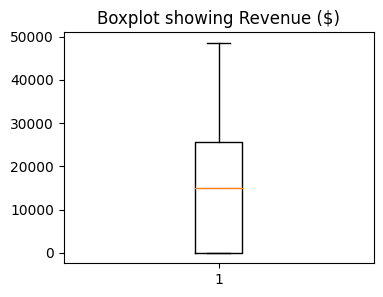

In [110]:
# boxplot of revenue
plt.figure(figsize=(4,3))
plt.title("Boxplot showing Revenue ($)")
plt.boxplot(pos_data['Revenue($)'])
plt.show()

**As many records have zero revenue, it makes sense to visualize the product-wise revenue**

In [112]:
# boxplot of mean revenue by SKU
df=pos_data.groupby('SKU ID').mean(numeric_only=True)
df

,Revenue($),Units_sold,Page_traffic
SKU ID,,,
SKU1011,18370.476190,809.380952,2540.809524
SKU1012,14881.166667,690.333333,2139.000000
SKU1013,17554.640000,900.800000,2685.960000
SKU1014,15142.500000,667.394737,1977.289474
SKU1015,16404.826087,819.608696,2481.217391
...,...,...,...
SKU1386,15053.821429,736.916667,2073.678571
SKU1387,15462.952381,714.880952,2213.071429
SKU1388,13529.285714,675.404762,1871.619048


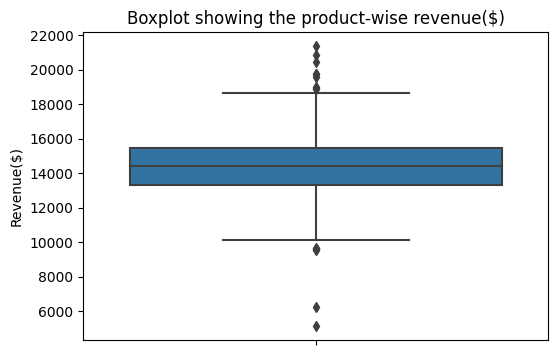

In [113]:
plt.figure(figsize=(6, 4))
plt.title("Boxplot showing the product-wise revenue($)")
sns.boxplot(y=df['Revenue($)'])
plt.show()

***Inference:***
- In previous video, we have seen that there are few products which have very low revenue.
- The box plot here also shows that there are some products with very high revenue as well.


#### Analyze and visualize the distribution of number of visitors to the web-page of the product

In [114]:
# summary of page traffic
print("Minimum number of visitors that any product page has: ", pos_data['Page_traffic'].min())
print('25th percentile or Q1 is: ', pos_data['Page_traffic'].quantile(0.25)) 
print('50th percentile or Q2 or median is: ', pos_data['Page_traffic'].quantile(0.5)) 
print('75th percentile or Q3 is: ', pos_data['Page_traffic'].quantile(0.75)) 
print('IQR is: ', pos_data['Page_traffic'].quantile(0.75)-pos_data['Page_traffic'].quantile(0.25)) 
print("Maximum number of visitors that any product page has: ", pos_data['Page_traffic'].max())

Minimum number of visitors that any product page has:  0
25th percentile or Q1 is:  0.0
50th percentile or Q2 or median is:  1960.0
75th percentile or Q3 is:  3646.0
IQR is:  3646.0
Maximum number of visitors that any product page has:  10696


***Inference:***
- We can see that at least 25% of the products have no visitors to the webpage. 
- This leads to a question: ***Are products with no visibility not being sold? That is, do these products have no revenue because they are unnoticed by visitors?***
- To answer this question, we need to check the records (or products) where page traffic is zero, and compare whether revenue is also zero for such records.

In [115]:
# comparing revenue with page traffic
df=pos_data.loc[pos_data['Page_traffic']==0]
print('Total number of products for which there are no visitors on the webpage: ', df.shape[0])
print('Total revenue of all the records where page traffic is zero:', df['Revenue($)'].sum())

Total number of products for which there are no visitors on the webpage:  11512
Total revenue of all the records where page traffic is zero: 0


***Inference:***
- It is proved that the products having no visitors have no revenue on a given day.
- To have more clarity, let us explore more about product details like SKU ID and the combination of Sector -> Category -> Segment -> Brand.
- Observe the dataset carefully. There are multiple SKU IDs for a single combination of the above listed attributes. For example, SKU IDs SKU1011 to SKU1020 represents a single product combination "Oral Care -> Tooth Paste -> Whitening Toothpaste -> Colgate".  This is because, the Colgate tooth paste may be available in different packages like 100gm pack, 200gm pack etc. Unfortunately, those details are not available in this dataset. However, since the manufacturer will have this information, they must introspect which package size is not being sold. And, they can analyze the reason and take appropriate action (prescriptive analytics).

***Let us visualize the page traffic and check whether there are any outliers***

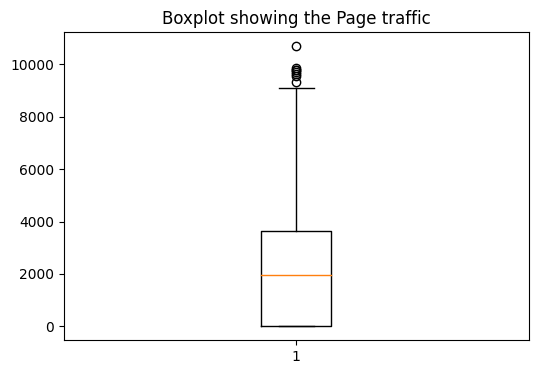

In [116]:
# boxplot of page traffic
plt.figure(figsize=(6, 4))
plt.title("Boxplot showing the Page traffic")
plt.boxplot(pos_data['Page_traffic'])
plt.show()

### Part 3.1.4  : What shape is my data?
- Statistically, it is a common practice to assume that the data is normally distributed (bell-shaped curve).
- However, it is important to check this.
- We can do this visually, or more formally with statistical tests.
- We will look at the visual methods here.
- Now, let us see some of the important properties of normally distributed data.

#### Important features of normally distributed data
- We should look at the distribution of the data from two aspects - (1) what statistical theory says, and (2) what is practically visible in most real data.
- Hence, there are two set of rules:
    - Empirical rules:
        - Data is spread symmetrically around the mean. 
        - mean = median = mode
       
    - Chebyshev's rule:
        - Data is not nessarily symmetric around the mean, and the curve is not bell-shaped.
        - Relationship between mean, median and mode may differ from one dataset to other.
- However, it is proven mathematically that, in either of the above cases, we can infer about how much data falls within certain range. Refer the image below.


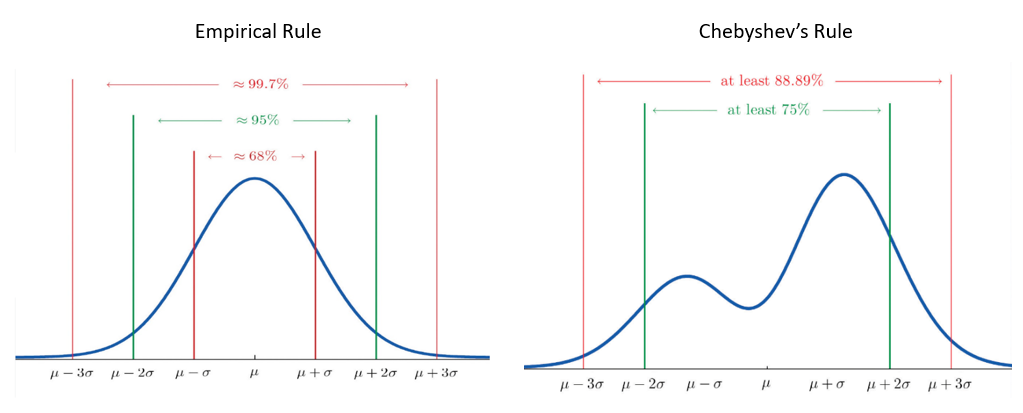

#### Visualize the revenue of sales data to understand the distribution

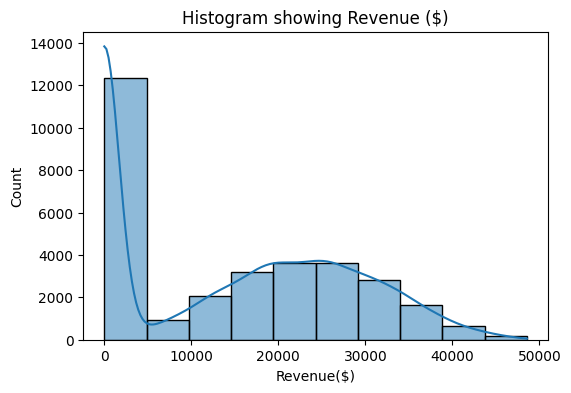

In [117]:
# histogram of revenue
plt.figure(figsize=(6, 4))
sns.histplot(pos_data['Revenue($)'],kde=True, bins=10)
plt.title('Histogram showing Revenue ($)')
plt.show()

***Inference:***
- The histogram shows that the our data is not normally distributed.
- As we have 11k+ records with zero revenue, this effect is visible in the plot.
- Let us apply Chebyshev's rule:
    - Average revenue = 14377.15 (we have calculated this before)
    - Standard deviation = 13424.79 (calculated before)
    - Now, at least 75% of the revenue falls between
    
    $ (14377.15 – 2*13424.79, 14377.15 + 2*13424.79) =  (-12472.43, 41226.73) $
- However, we know that our data do not have negative revenue, and hence the result of this theoretical formula can be treated as : 75% of the revenue is falling between 0 and 41226.73

In [118]:
# what is the 75th percentile?
pos_data['Revenue($)'].quantile(0.75)

25655.0

**Let us group the revenue by SKU and see how it looks**

In [119]:
# revenue by SKU
Revenue_avg=pos_data.groupby('SKU ID').mean(numeric_only=True)
Revenue_avg

,Revenue($),Units_sold,Page_traffic
SKU ID,,,
SKU1011,18370.476190,809.380952,2540.809524
SKU1012,14881.166667,690.333333,2139.000000
SKU1013,17554.640000,900.800000,2685.960000
SKU1014,15142.500000,667.394737,1977.289474
SKU1015,16404.826087,819.608696,2481.217391
...,...,...,...
SKU1386,15053.821429,736.916667,2073.678571
SKU1387,15462.952381,714.880952,2213.071429
SKU1388,13529.285714,675.404762,1871.619048


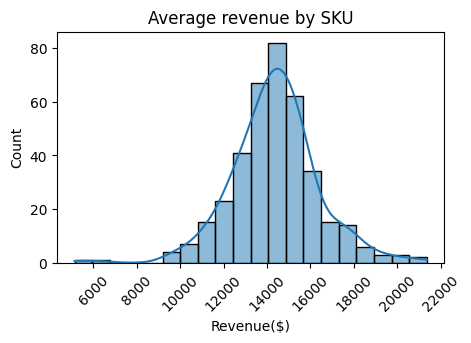

In [120]:
# histogram of average revenue by SKU
plt.figure(figsize=(5, 3))
sns.histplot(Revenue_avg['Revenue($)'],kde=True, bins=20)
plt.xticks(rotation=45)
plt.title('Average revenue by SKU')
plt.show()

***Inference:***
- We can now say that the average revenue across the products is almost normally distributed.
- When we see the revenue across the days, we observed that thre are lot of products showed zero revenue on certain days. However, if we collectively see the performance of the products over several days, they are doing reasonably good.
- Howerver, as a business strategist, one must think to improve the sales of the products having less revenues here.

#### Shape of normal distribution
- Based on small deviation in the shape of distributions from the normal distribution, two more measures are useful.
- They are known as *skewness* and *kurtosis*


#### Skewness
- Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 
- A distribution, or data set, is symmetric if it looks like a bell-shaped curve (normal/Gaussian distribution).
- Skewness provides insight into the shape of the distribution and the concentration of data points around the mean.
- Skewness can be calculated using various methods, with the most common formula being:

$ Skewness = \frac{3(Mean - Median)}{Standard Deviation}$

- If the skewness is between 
    - -0.5 and 0.5, the data are nearly symmetrical.
    - -1 and -0.5 then the distribution is slightly negatively skewed.
    - 0.5 and 1, the distribution is slightly positive skewed.
- If the skewness is lower than -1  or greater than 1, the data are extremely skewed.

In [ ]:
Image('skew.png')

In [121]:
# Skewness of revenue
print("skewness of the revenue data across the records: ", pos_data['Revenue($)'].skew().round(2))   #slight positive skewness
print("skewness of the revenue data aggregated by products: ", Revenue_avg['Revenue($)'].skew().round(2))      #slight negative skewness

skewness of the revenue data across the records:  0.28
skewness of the revenue data aggregated by products:  -0.08


####  Kurtosis
- It provides insight into the peakedness or flatness of the distribution compared to the normal distribution. 
- A high kurtosis indicates heavy tails or outliers, while a low kurtosis indicates light tails or lack of outliers.
- Kurtosis for normal distribution (to be more specific, standard normal distribution) is 3.
- Leptokurtic distributions have kurtosis >3
- Platykurtic distributions have kurtosis <3

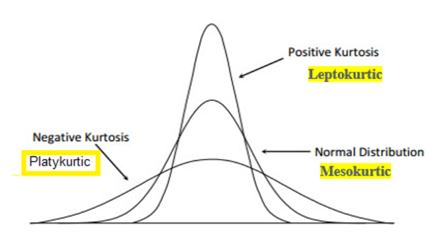

In [122]:
# print out the kurtosis
print("Kurtosis of the revenue data across the records: ", pos_data['Revenue($)'].kurtosis().round(2))   
print("Kurtosis of the revenue data aggregated by products: ", Revenue_avg['Revenue($)'].kurtosis().round(2))   

Kurtosis of the revenue data across the records:  -1.28
Kurtosis of the revenue data aggregated by products:  2.19


***Inference:***
- Due to the large number of zeros in the revenue data, we can see that the distribution is flat and hence it is platykurtic.
- However, when we aggregate the revenue per product, data is nearing to normal distribution.